<a href="https://colab.research.google.com/github/SWLee1212/KAIST-ML-Advanced-courses/blob/master/4_1_simple_binarytree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd


# 직업, 키, 성별로 이름을 구분하는 간단한 이진트리 분류기를 만들어보겠습니다.
name = ['하하', '김범수', '다현', '아이유', '최민식', '김혜수']
job  = ['가수', '가수'  , '가수', '가수'  , '배우'  , '배우']
height = [171, 182, 158, 160, 177, 170]
sex = ['M', 'M', 'F', 'F', 'M', 'F']

# Node 번호를 지정해주기 위한 변수
num = 0

# Node 정보를 저장하기 위한 딕셔너리 생성
node_list = {}

# 데이터 프레임 만들기
data = pd.DataFrame({'이름': name, '직업': job, '키': height,'성별': sex})
print(data,'\n')

    이름  직업    키 성별
0   하하  가수  171  M
1  김범수  가수  182  M
2   다현  가수  158  F
3  아이유  가수  160  F
4  최민식  배우  177  M
5  김혜수  배우  170  F 



In [17]:
male = []
female = []



for i, s in enumerate(data['성별']):
  print(i,s)
  if s == 'M':
    male.append(i)
  elif s == 'F':
    female.append(i)

print(male,'\n',female)




0 M
1 M
2 F
3 F
4 M
5 F
[0, 1, 4] 
 [2, 3, 5]


In [18]:
data.loc[male,['d']]

,직업
0,가수
1,가수
4,배우


In [19]:
import numpy as np
import pandas as pd


# 직업, 키, 성별로 이름을 구분하는 간단한 이진트리 분류기를 만들어보겠습니다.
name = ['하하', '김범수', '다현', '아이유', '최민식', '김혜수']
job  = ['가수', '가수'  , '가수', '가수'  , '배우'  , '배우']
height = [171, 182, 158, 160, 177, 170]
sex = ['M', 'M', 'F', 'F', 'M', 'F']

# Node 번호를 지정해주기 위한 변수
num = 0

# Node 정보를 저장하기 위한 딕셔너리 생성
node_list = {}

# 데이터 프레임 만들기
data = pd.DataFrame({'이름': name, '직업': job, '키': height,'성별': sex})
print(data,'\n')

"""
1. 성별에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Sex_Node(df, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    # Node num, Depth, Node Name 출력
    num +=1
    print('Node_num : {} | Node Depth : {} | Sex_Node'.format(num, depth))
    node_list[num] = 'Sex_Node'
    
    male = []
    female = []
    # 처음 성별 데이터 전체로 분류
    for idx, sex in enumerate(data['성별']):
        # 남자인 경우 Index 저장
        if sex == 'M':
            male.append(idx)
        # 여자인 경우 Index 저장
        elif sex == 'F':
            female.append(idx)
    
    # Index 확인
    print('남자 Index : ',male)
    print('여자 Index : ',female)
    
    # 성별 분류 후 직업을 분류하는 Node를 호출합니다.
    Job_Node(df,   male, depth+1)
    Job_Node(df, female, depth+1)
    
"""
2. 직업에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Job_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1
    
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Job_Node'.format(num, depth))
    node_list[num] = 'Job_Node'
    
    # Index 저장을 위한 리스트 
    singer = []
    
    for i in idx:
        # 가수인 경우 Index 저장
        if data.loc[i,'직업'] == '가수':
            singer.append(i)
            
        # 배우인 경우 Node 번호와 해당 배우의 이름 출력    
        else:
            num += 1
            print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1 ,data['이름'][i]))
            node_list[num] = data['이름'][i]
    
    # 가수인 경우 분류가 끝나지 않았으므로 Index 출력
    print('가수 Index : ',singer)
    
    # 마지막 분류 기준인 키를 통해 가수를 분류
    Height_Node(df, singer, depth+1)

"""
3. 키에 따라 사람을 분류하는 함수를 구현합니다.
"""
def Height_Node(df,idx, depth):
    # 전역 변수를 함수 내에서 사용하기 위해 Global 선언
    global num
    global node_list
    num +=1
    # Node num, Depth, Node Name 출력
    print('Node_num : {} | Node Depth : {} | Height_Node'.format(num, depth))
    node_list[num] = 'Height_Node'
    
    for i in idx:
        num +=1
        # 성별에 따라 키의 기준이 다르기 때문에 성별을 우선 분류
        if df.loc[i,'성별'] =='M' :
            # 남자의 경우 키에 따라 분류
            # 키가 180보다 작은 경우
            if df.loc[i,'키'] < 180:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 180보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
        else:
            # 여자의 경우 키에 따라 분류
            # 키가 160보다 작은 경우
            if df.loc[i,'키'] < 160:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]
            # 키가 160보다 큰 경우
            else:
                print('Node_num : {} | Node Depth : {} | Name : {}'.format(num, depth+1,data['이름'][i]))
                node_list[num] = data['이름'][i]

def main():
    # 첫 번째 분류 기준으로 성별을 설정합니다.
    Sex_Node(data, 1)
    print(node_list)

if __name__=="__main__":
    main()

    이름  직업    키 성별
0   하하  가수  171  M
1  김범수  가수  182  M
2   다현  가수  158  F
3  아이유  가수  160  F
4  최민식  배우  177  M
5  김혜수  배우  170  F 

Node_num : 1 | Node Depth : 1 | Sex_Node
남자 Index :  [0, 1, 4]
여자 Index :  [2, 3, 5]
Node_num : 2 | Node Depth : 2 | Job_Node
Node_num : 3 | Node Depth : 3 | Name : 최민식
가수 Index :  [0, 1]
Node_num : 4 | Node Depth : 3 | Height_Node
Node_num : 5 | Node Depth : 4 | Name : 하하
Node_num : 6 | Node Depth : 4 | Name : 김범수
Node_num : 7 | Node Depth : 2 | Job_Node
Node_num : 8 | Node Depth : 3 | Name : 김혜수
가수 Index :  [2, 3]
Node_num : 9 | Node Depth : 3 | Height_Node
Node_num : 10 | Node Depth : 4 | Name : 다현
Node_num : 11 | Node Depth : 4 | Name : 아이유
{1: 'Sex_Node', 2: 'Job_Node', 3: '최민식', 4: 'Height_Node', 5: '하하', 6: '김범수', 7: 'Job_Node', 8: '김혜수', 9: 'Height_Node', 10: '다현', 11: '아이유'}


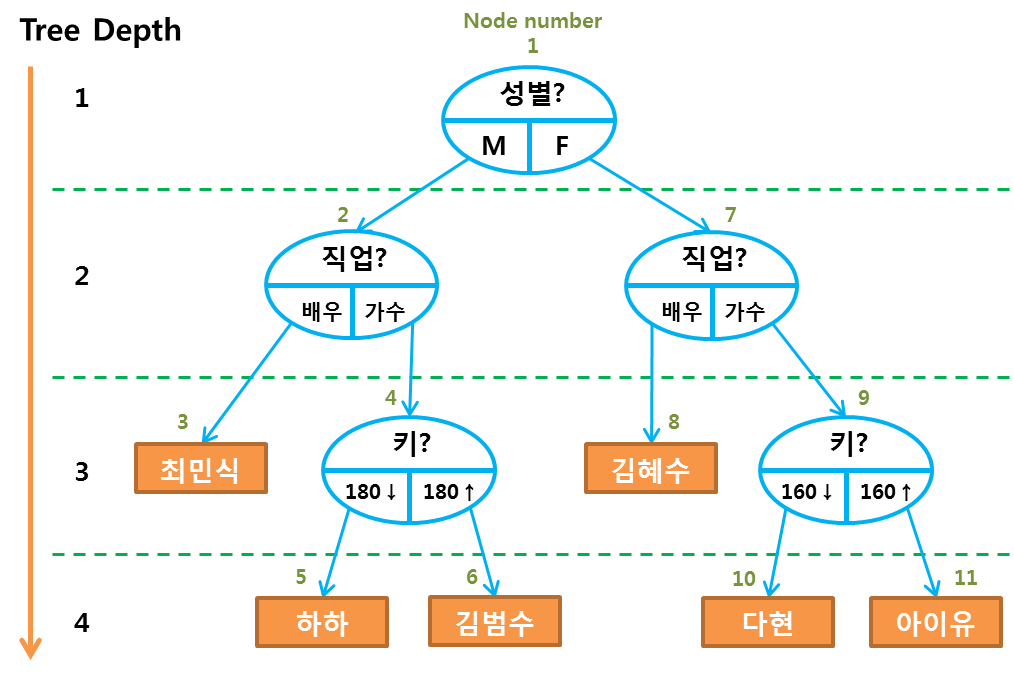